Revenue Prediction
==================
In this project the goal is to predict movies revenue using their features. revenue is given by ( box_office - budget ) so the main goal is to predict box office. 

1. Prepare and preprocess the given data. 

2. After exploring data find, select and especially create new features. ignore others.

3. Prepare features to feed the model. 

4. Select and try different models.

5. Document and report each step using relative plots and a brief explanation. finally report the best suited model and justify why did it performed well.



- Keep in mind that in this task accuracy itself only has only part of score.

- Hint: to create new features you can use credit attributes. Think of it this way, what affects box office?  

**Tools** 

importing useful tools and libraries. you may use any other library as well.

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Modelling
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [242]:
np.random.seed(101)

In [ ]:
# Your project struct must look like this,


# |── Name_SID.zip
# │   ├── data
# │   │       ├── rotten_tomatoes_5000_movies.csv
# │   │       ├── rotten_tomatoes_5000_movies.csv
# │   ├── *.ipynb
# │   ├── document.pdf

df_movies = pd.read_csv("rotten_tomatoes_5000_movies.csv")
df_credit = pd.read_csv("rotten_tomatoes_5000_credits.csv")


print("Movies dataset info:")
df_movies.info()

print("\nCredits dataset info:")
df_credit.info()


Movies dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rt_production_budget     4803 non-null   int64  
 1   rt_genres                4803 non-null   object 
 2   rt_website               1712 non-null   object 
 3   rt_movie_id              4803 non-null   int64  
 4   rt_keywords              4803 non-null   object 
 5   rt_original_language     4803 non-null   object 
 6   rt_original_title        4803 non-null   object 
 7   rt_synopsis              4800 non-null   object 
 8   rt_audience_score        4803 non-null   float64
 9   rt_studios               4803 non-null   object 
 10  rt_production_countries  4803 non-null   object 
 11  rt_release_date          4802 non-null   object 
 12  rt_box_office            4803 non-null   int64  
 13  rt_runtime               4801 non-null   float64
 14  rt_

In [ ]:
import pandas as pd
import ast


print("تعداد فیلم‌ها قبل از پردازش:", df_movies.shape[0])


columns_to_drop = ["rt_website", "rt_tagline"]
df_movies.drop(columns=[col for col in columns_to_drop if col in df_movies.columns], inplace=True)


df_movies["rt_release_date"] = pd.to_datetime(df_movies["rt_release_date"], errors='coerce')


df_movies["rt_runtime"].fillna(df_movies["rt_runtime"].mean(), inplace=True)
df_movies["rt_synopsis"].fillna("Unknown", inplace=True)


print("\nبررسی نمونه‌ای از rt_genres قبل از تبدیل:")
print(df_movies["rt_genres"].head())

print("\nبررسی نمونه‌ای از rt_production_countries قبل از تبدیل:")
print(df_movies["rt_production_countries"].head())


df_movies["rt_genres"] = df_movies["rt_genres"].apply(lambda x: [d["name"] for d in ast.literal_eval(x)] if isinstance(x, str) else [])
df_movies["rt_production_countries"] = df_movies["rt_production_countries"].apply(lambda x: [d["name"] for d in ast.literal_eval(x)] if isinstance(x, str) else [])

print("\nبررسی ساختار `rt_genres` پس از تبدیل:")
print(df_movies["rt_genres"].head())

print("\nبررسی ساختار `rt_production_countries` پس از تبدیل:")
print(df_movies["rt_production_countries"].head())


print("\nتعداد فیلم‌هایی که ژانر ندارند:", df_movies["rt_genres"].apply(len).eq(0).sum())
print("تعداد فیلم‌هایی که کشور ندارند:", df_movies["rt_production_countries"].apply(len).eq(0).sum())

df_movies = df_movies[df_movies["rt_genres"].apply(lambda x: len(x) > 0)]
df_movies = df_movies[df_movies["rt_production_countries"].apply(lambda x: len(x) > 0)]

print("\nتعداد فیلم‌ها بعد از فیلتر:", df_movies.shape[0])

df_movies.info()


تعداد فیلم‌ها قبل از پردازش: 4803

بررسی نمونه‌ای از rt_genres قبل از تبدیل:
0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: rt_genres, dtype: object

بررسی نمونه‌ای از rt_production_countries قبل از تبدیل:
0    [{"iso_3166_1": "US", "name": "United States o...
1    [{"iso_3166_1": "US", "name": "United States o...
2    [{"iso_3166_1": "GB", "name": "United Kingdom"...
3    [{"iso_3166_1": "US", "name": "United States o...
4    [{"iso_3166_1": "US", "name": "United States o...
Name: rt_production_countries, dtype: object

بررسی ساختار `rt_genres` پس از تبدیل:
0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2                       [Action, Adventure, Crime]
3                 [Action, Crime, Drama, Thrille

In [ ]:

from sklearn.model_selection import train_test_split


df_movies = df_movies[df_movies["rt_box_office"] != 0]


y = df_movies["rt_box_office"]
X = df_movies.drop(columns=["rt_box_office", "rt_movie_id", "rt_title", "rt_original_title"])  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


print(f" Training Data Shape: {X_train.shape}")
print(f" Test Data Shape: {X_test.shape}")


 Training Data Shape: (2515, 14)
 Test Data Shape: (839, 14)


1."متوسط هزینه برای هر ژانر فیلم چقدر است؟"

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

rt_genres
Animation          6.646590e+07
Adventure          6.632686e+07
Fantasy            6.356061e+07
Science Fiction    5.186555e+07
Action             5.151075e+07
Family             5.071951e+07
War                3.528246e+07
Thriller           3.196821e+07
Mystery            3.074449e+07
History            2.990347e+07
Crime              2.784981e+07
Western            2.707870e+07
Comedy             2.531342e+07
Drama              2.067832e+07
Romance            2.031136e+07
Music              1.590795e+07
Horror             1.457403e+07
Documentary        2.653288e+06
TV Movie           1.150000e+06
Foreign            6.580884e+05
Name: rt_production_budget, dtype: float64


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

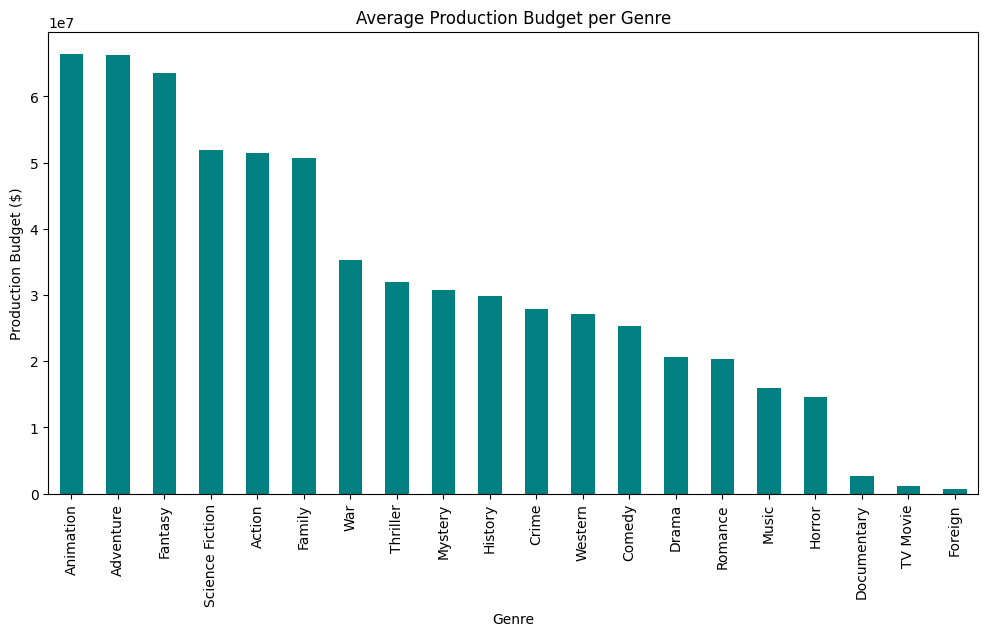

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt


df_movies = pd.read_csv("rotten_tomatoes_5000_movies.csv")


df_movies.drop(columns=["rt_website", "rt_tagline"], inplace=True)
df_movies["rt_release_date"] = pd.to_datetime(df_movies["rt_release_date"])
df_movies["rt_runtime"].fillna(df_movies["rt_runtime"].mean(), inplace=True)
df_movies["rt_synopsis"].fillna("Unknown", inplace=True)


df_movies["rt_genres"] = df_movies["rt_genres"].apply(lambda x: [d["name"] for d in ast.literal_eval(x)] if isinstance(x, str) else [])


df_exploded = df_movies.explode("rt_genres") 

genre_budget = df_exploded.groupby("rt_genres")["rt_production_budget"].mean().sort_values(ascending=False)


print(genre_budget)


plt.figure(figsize=(12, 6))
genre_budget.plot(kind="bar", color="teal")
plt.title("Average Production Budget per Genre")
plt.xlabel("Genre")
plt.ylabel("Production Budget ($)")
plt.show()


سوال2: "سهم هر کشور در مجموع هزینه هر ژانر فیلم چقدر است؟ (برای 5 تا از پر خرج‌ترین ژانرها)

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

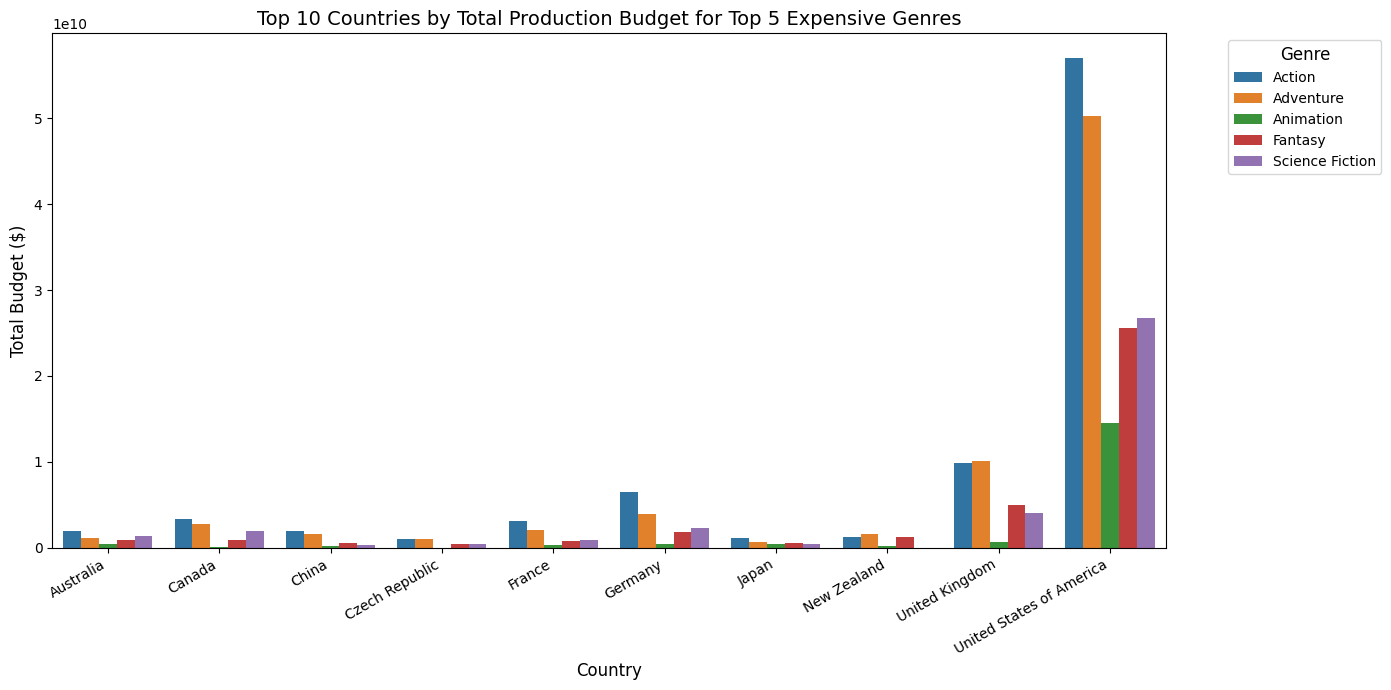

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns


df_movies["rt_production_countries"] = df_movies["rt_production_countries"].apply(
    lambda x: [d["name"] for d in ast.literal_eval(x)] if isinstance(x, str) else []
)


df_movies_cleaned = df_movies[df_movies["rt_production_countries"].apply(len) > 0].copy()


df_exploded_genres = df_movies_cleaned.explode("rt_genres")
top_5_genres = df_exploded_genres.groupby("rt_genres")["rt_production_budget"].mean().nlargest(5).index
df_top_5_genres = df_exploded_genres[df_exploded_genres["rt_genres"].isin(top_5_genres)]


df_exploded_countries = df_top_5_genres.explode("rt_production_countries")


country_genre_budget = (
    df_exploded_countries
    .groupby(["rt_production_countries", "rt_genres"])["rt_production_budget"]
    .sum()
    .reset_index()
)


country_genre_budget = country_genre_budget[country_genre_budget["rt_production_budget"] > 0]


top_countries = (
    country_genre_budget.groupby("rt_production_countries")["rt_production_budget"]
    .sum()
    .nlargest(10)
    .index
)
country_genre_budget_filtered = country_genre_budget[country_genre_budget["rt_production_countries"].isin(top_countries)]


plt.figure(figsize=(14, 7))
sns.barplot(
    data=country_genre_budget_filtered,
    x="rt_production_countries",
    y="rt_production_budget",
    hue="rt_genres",
    dodge=True
)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Top 10 Countries by Total Production Budget for Top 5 Expensive Genres", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Budget ($)", fontsize=12)
plt.legend(title="Genre", fontsize=10, title_fontsize=12, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


سوال 3 : تعداد فیلم‌های ساخته‌شده در 3 ژانر در 10 سال گذشته را مقایسه کنید.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9284\1878649039.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif'

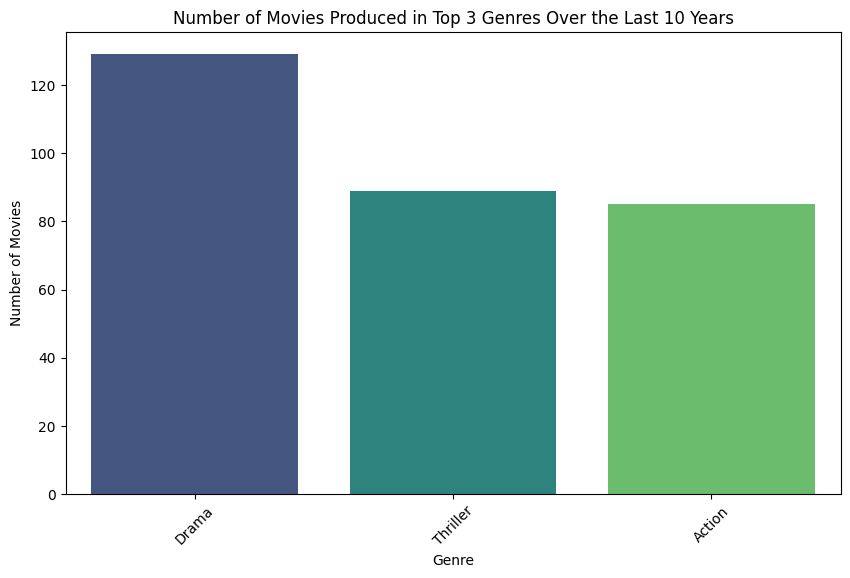

تعداد فیلم‌ها در ۱۰ سال اخیر برای هر ژانر:
rt_genres
Drama       129
Thriller     89
Action       85
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


recent_years = df_movies[df_movies["rt_release_date"] > pd.Timestamp.now() - pd.DateOffset(years=10)]


df_exploded = recent_years.explode("rt_genres")


top_3_genres = df_exploded["rt_genres"].value_counts().head(3).index


filtered_df = df_exploded[df_exploded["rt_genres"].isin(top_3_genres)]


genre_counts = filtered_df["rt_genres"].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title("Number of Movies Produced in Top 3 Genres Over the Last 10 Years")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()


print("تعداد فیلم‌ها در ۱۰ سال اخیر برای هر ژانر:")
print(genre_counts)


سوال 4 به طور متوسط کدوم کشورها طولانی ترین فیلم ها و کوتاه ترین فیلم ها رو میسازند؟

In [ ]:
import pandas as pd


df_exploded_countries = df_movies.explode("rt_production_countries")


df_exploded_countries = df_exploded_countries[df_exploded_countries["rt_runtime"] > 0]


country_runtime = (
    df_exploded_countries.groupby("rt_production_countries")["rt_runtime"]
    .mean()
    .sort_values(ascending=False)
)


longest_movie_country = country_runtime.idxmax()
shortest_movie_country = country_runtime.idxmin()


print(f"کشور با طولانی‌ترین فیلم‌ها (به طور متوسط): {longest_movie_country} با میانگین مدت زمان {country_runtime.max():.2f} دقیقه")
print(f"کشور با کوتاه‌ترین فیلم‌ها (به طور متوسط): {shortest_movie_country} با میانگین مدت زمان {country_runtime.min():.2f} دقیقه")


print("\nمیانگین مدت زمان فیلم‌ها برای هر کشور:")
print(country_runtime)


کشور با طولانی‌ترین فیلم‌ها (به طور متوسط): Libyan Arab Jamahiriya با میانگین مدت زمان 173.00 دقیقه
کشور با کوتاه‌ترین فیلم‌ها (به طور متوسط): Kenya با میانگین مدت زمان 60.00 دقیقه

میانگین مدت زمان فیلم‌ها برای هر کشور:
rt_production_countries
Libyan Arab Jamahiriya    173.0
Dominica                  151.0
Malta                     143.0
Kyrgyz Republic           135.0
Portugal                  133.0
                          ...  
Angola                     85.0
Monaco                     84.0
Afghanistan                83.0
Guadaloupe                 78.0
Kenya                      60.0
Name: rt_runtime, Length: 88, dtype: float64


سوال 5 :به غیر انگلیسی پرتکرار ترین زبان ها درفیلم ها چه هستند؟

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9284\692940856.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.index, y=top_languages.values, palette="viridis")
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif

Most frequent non-English languages in movies:
rt_languages
Français     437
Español      351
Deutsch      262
Italiano     188
Pусский      185
普通话          107
日本語           97
Português     68
العربية       67
              54
Name: count, dtype: int64


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

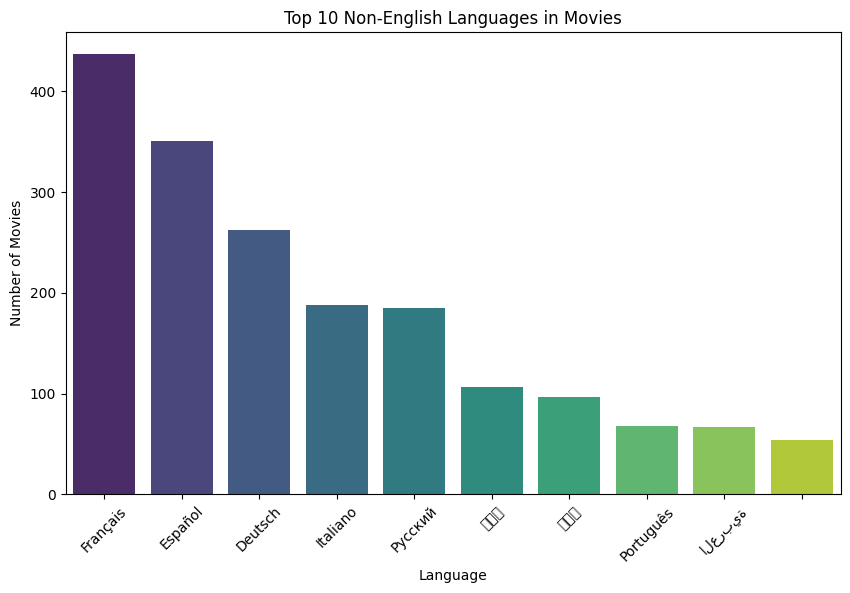

In [ ]:
import ast


df_movies["rt_languages"] = df_movies["rt_languages"].apply(
    lambda x: [d["name"] for d in ast.literal_eval(x)] if isinstance(x, str) else []
)


df_exploded_languages = df_movies.explode("rt_languages")


non_english_languages = df_exploded_languages[
    df_exploded_languages["rt_languages"].str.lower() != "english"
]


top_languages = non_english_languages["rt_languages"].value_counts().head(10)


print("Most frequent non-English languages in movies:")
print(top_languages)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_languages.index, y=top_languages.values, palette="viridis")
plt.title("Top 10 Non-English Languages in Movies")
plt.xlabel("Language")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()


 سوال 6 : آمریکا در 10 سال گذشته، به طور متوسط در هر سال چقدر در صنعت فیلمسازی هزینه کرده است ؟(به تفکیک سال)

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

Total yearly production budget in the US (2015-2024):
rt_release_date
2015    6332175004
2016    4631400000
Name: rt_production_budget, dtype: int64


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


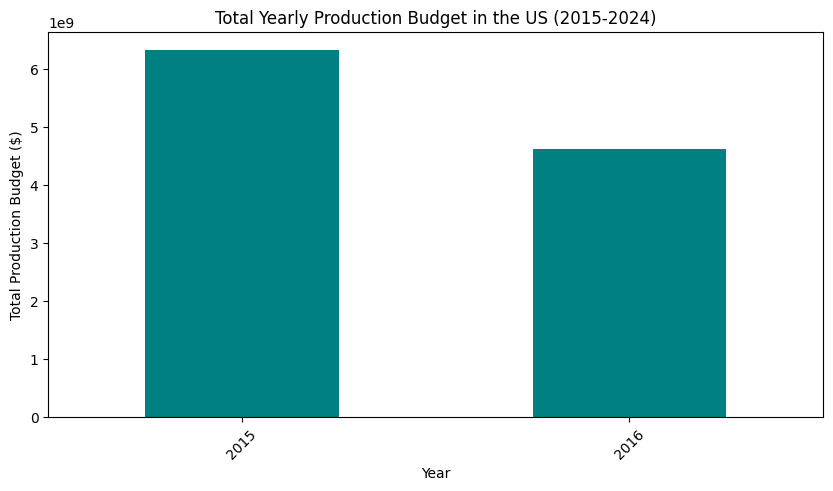

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


us_movies = df_movies[df_movies["rt_production_countries"].apply(lambda x: "United States of America" in x)]


recent_us_movies = us_movies[(us_movies["rt_release_date"].dt.year >= 2015) & 
                             (us_movies["rt_release_date"].dt.year <= 2024)]


yearly_budget = recent_us_movies.groupby(recent_us_movies["rt_release_date"].dt.year)["rt_production_budget"].sum()

print("Total yearly production budget in the US (2015-2024):")
print(yearly_budget)


plt.figure(figsize=(10, 5))
yearly_budget.plot(kind="bar", color="teal")
plt.title("Total Yearly Production Budget in the US (2015-2024)")
plt.xlabel("Year")
plt.ylabel("Total Production Budget ($)")
plt.xticks(rotation=45)
plt.show()


سوال 7 : روند قبلی رو بدون در نظر گرفتن کشور برای 10 سال گذشته در نظر بگیرید

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

Total yearly production budget (2015-2024) for all movies:
rt_release_date
2015    6724547367
2016    4753140000
2017             0
Name: rt_production_budget, dtype: int64


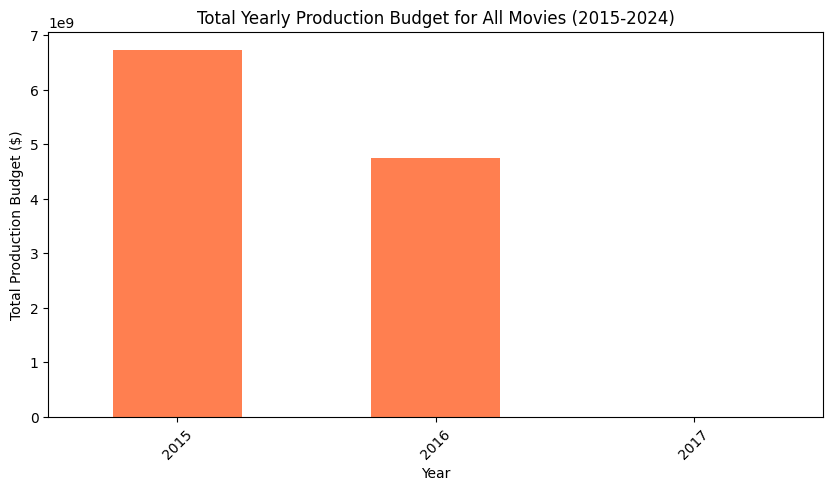

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


recent_movies = df_movies[(df_movies["rt_release_date"].dt.year >= 2015) & 
                          (df_movies["rt_release_date"].dt.year <= 2024)]

yearly_budget_all_countries = recent_movies.groupby(recent_movies["rt_release_date"].dt.year)["rt_production_budget"].sum()


print("Total yearly production budget (2015-2024) for all movies:")
print(yearly_budget_all_countries)


plt.figure(figsize=(10, 5))
yearly_budget_all_countries.plot(kind="bar", color="coral")
plt.title("Total Yearly Production Budget for All Movies (2015-2024)")
plt.xlabel("Year")
plt.ylabel("Total Production Budget ($)")
plt.xticks(rotation=45)
plt.show()


سوال 8 : جانی دپ در چه فیلم هایی بازی کرده است ؟

In [ ]:

johnny_depp_movies = df_credit[df_credit["rt_actors"].str.contains("Johnny Depp", na=False)]


johnny_depp_table = johnny_depp_movies[["rt_title", "rt_movie_id"]].rename(columns={"rt_title": "rt_title_movies"})



johnny_depp_table.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'black'), ('color', 'white')]}]
).set_properties(**{'text-align': 'center'})


,rt_title_movies,rt_movie_id
1,Pirates of the Caribbean: At World's End,285
12,Pirates of the Caribbean: Dead Man's Chest,58
13,The Lone Ranger,57201
17,Pirates of the Caribbean: On Stranger Tides,1865
32,Alice in Wonderland,12155
105,Alice Through the Looking Glass,241259
117,Charlie and the Chocolate Factory,118
133,Dark Shadows,62213
178,Rango,44896
199,Pirates of the Caribbean: The Curse of the Black Pearl,22


سوال 9 : به طور متوسط چند درصد نقش اول تا پنجم فیلم ها (به تفکیک برای هر نقش)مرد،و چند درصد زن هستند؟

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

Gender Distribution for each Role:
Role 1: Male: 74.04359430604983%, Female: 25.95640569395018%
Role 2: Male: 59.47742379096952%, Female: 40.52257620903048%
Role 3: Male: 60.88283634656022%, Female: 39.117163653439775%
Role 4: Male: 64.0019263183241%, Female: 35.9980736816759%
Role 5: Male: 68.00406297613002%, Female: 31.995937023869985%


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

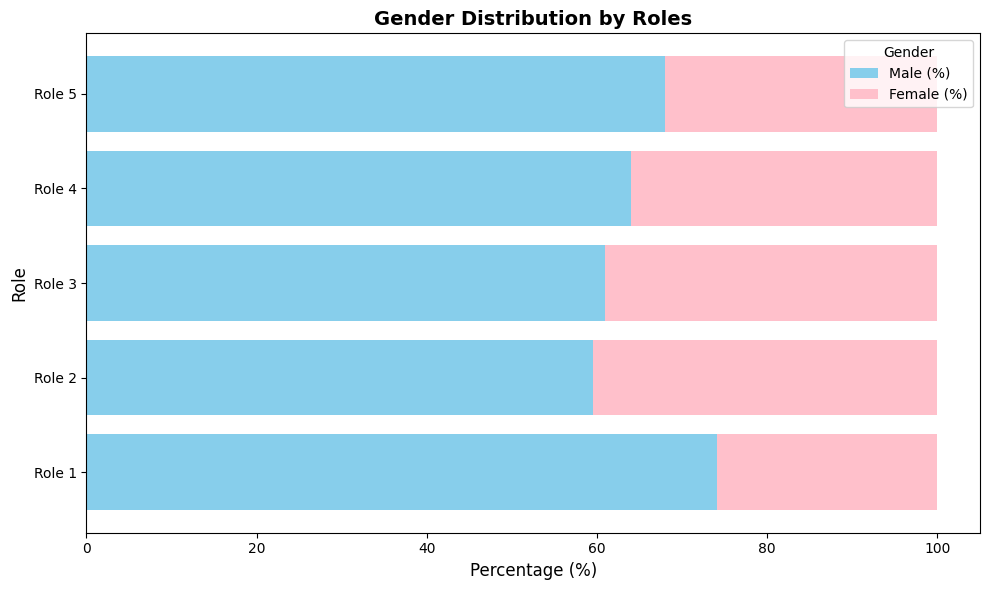

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt


credits = pd.read_csv('rotten_tomatoes_5000_credits.csv')


def get_gender_distribution(actors):
    try:
        actor_list = json.loads(actors)
        gender_distribution = []

        
        for actor in actor_list[:5]:
            gender = actor.get('gender', None)  
            if gender == 1:
                gender_distribution.append(('Female', 100))
            elif gender == 2:
                gender_distribution.append(('Male', 100))
            else:
                gender_distribution.append(('Unknown', 0))

        while len(gender_distribution) < 5:
            gender_distribution.append(('Unknown', 0))

        return gender_distribution
    except Exception as e:
        print(f"Error processing actors: {e}")
        return [('Unknown', 0)] * 5


gender_distributions = credits['rt_actors'].apply(lambda x: get_gender_distribution(x))


for i in range(5):
    credits[f'Role_{i+1}_Gender'] = [dist[i][0] for dist in gender_distributions]
    credits[f'Role_{i+1}_Percentage'] = [dist[i][1] for dist in gender_distributions]


role_gender_counts = {'Male': [0] * 5, 'Female': [0] * 5, 'Unknown': [0] * 5}
for dist in gender_distributions:
    for i in range(5):
        if dist[i][0] == 'Male':
            role_gender_counts['Male'][i] += 1
        elif dist[i][0] == 'Female':
            role_gender_counts['Female'][i] += 1
        else:
            role_gender_counts['Unknown'][i] += 1

# محاسبه درصد نقش‌ها
def calculate_role_percentages(gender_counts):
    role_percentages = {'Male': [], 'Female': []}
    for i in range(5):
        total = gender_counts['Male'][i] + gender_counts['Female'][i]
        if total == 0:
            male_percentage, female_percentage = 0, 0
        else:
            male_percentage = (gender_counts['Male'][i] / total) * 100
            female_percentage = (gender_counts['Female'][i] / total) * 100

        role_percentages['Male'].append(male_percentage)
        role_percentages['Female'].append(female_percentage)

    return role_percentages

role_percentages = calculate_role_percentages(role_gender_counts)

# نمایش درصدها
print("Gender Distribution for each Role:")
for i in range(5):
    print(f"Role {i+1}: Male: {role_percentages['Male'][i]}%, Female: {role_percentages['Female'][i]}%")

# رسم نمودار
roles = [f"Role {i+1}" for i in range(5)]
plt.figure(figsize=(10, 6))
plt.barh(roles, role_percentages['Male'], color="skyblue", label="Male (%)")
plt.barh(roles, role_percentages['Female'], left=role_percentages['Male'], color="pink", label="Female (%)")
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Role", fontsize=12)
plt.title("Gender Distribution by Roles", fontsize=14, fontweight="bold")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


سوال 10 : محبوب ترین ژانرهای فیلم در 10 سال گذشته به چه ترتیب بوده است؟(یکبار بر اساس تعداد review و یکبار براساس critics_score مقایسه کنید.)

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun


📌 **Top 10 Genres by Review Count (2015-2024):**
          Genre  Total Review Count
      Adventure              154729
         Action              147583
          Drama              108345
Science Fiction              104354
       Thriller               96378
         Comedy               82153
          Crime               42145
        Fantasy               42088
         Family               35220
      Animation               27315

📌 **Top 10 Genres by Critics Score (2015-2024):**
          Genre  Average Critics Score
            War               6.780000
        History               6.620000
      Animation               6.370588
      Adventure               6.263793
        Romance               6.237500
        Fantasy               6.095652
         Family               6.059259
          Drama               6.009774
         Comedy               5.894937
Science Fiction               5.894872


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

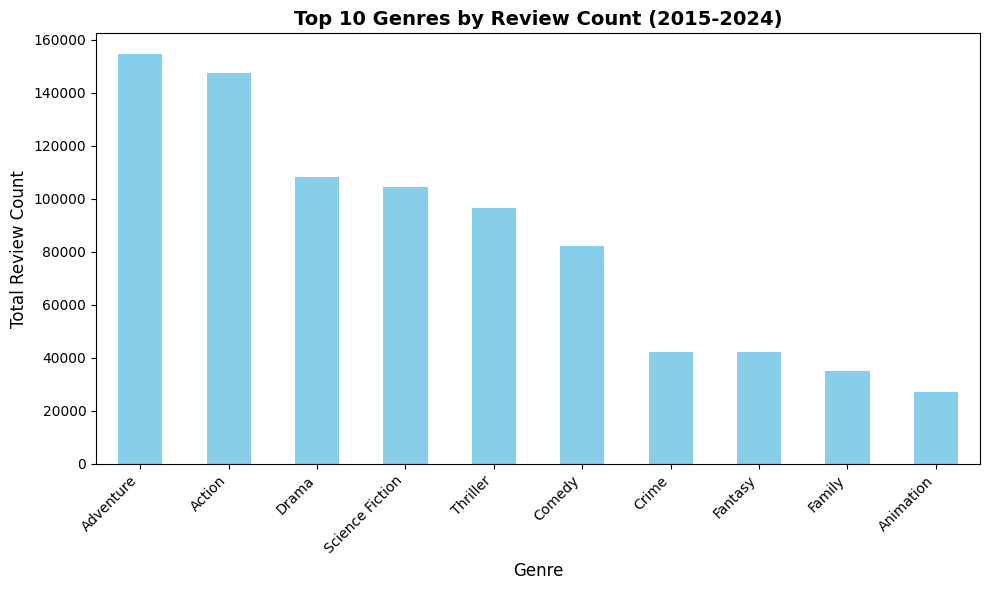

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

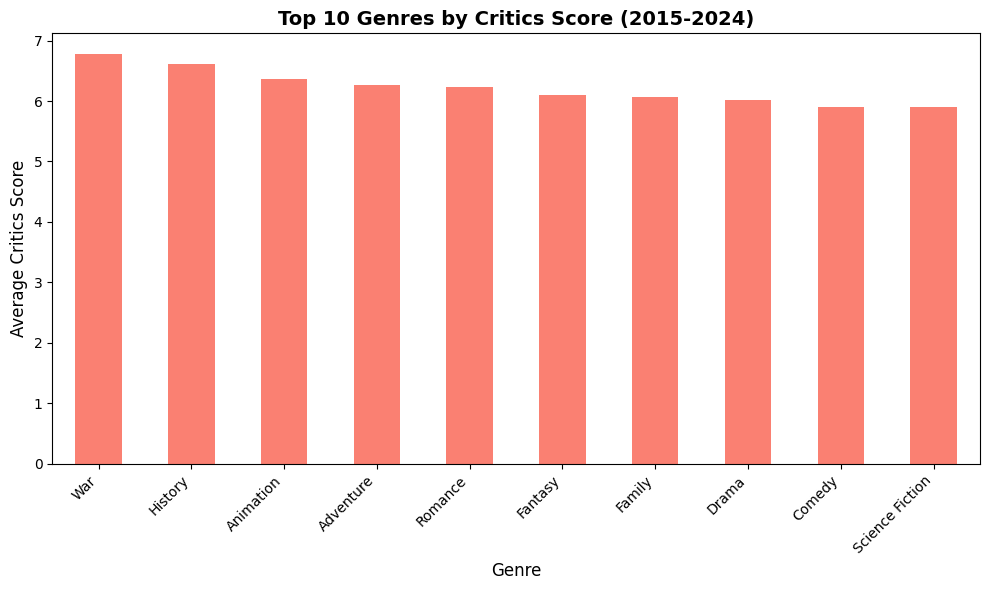

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import ast


df_movies["rt_release_date"] = pd.to_datetime(df_movies["rt_release_date"], errors='coerce')


df_movies["rt_genres"] = df_movies["rt_genres"].apply(lambda x: [d["name"] for d in ast.literal_eval(x)] if isinstance(x, str) else [])


recent_movies = df_movies[df_movies["rt_release_date"].dt.year.between(2015, 2024)]


df_exploded = recent_movies.explode("rt_genres")


top_genres_reviews = df_exploded.groupby("rt_genres")["rt_review_count"].sum().sort_values(ascending=False)


top_genres_critics = df_exploded.groupby("rt_genres")["rt_critics_score"].mean().sort_values(ascending=False)


print("\n **Top 10 Genres by Review Count (2015-2024):**")
df_reviews_table = pd.DataFrame({
    "Genre": top_genres_reviews.head(10).index,
    "Total Review Count": top_genres_reviews.head(10).values
})
print(df_reviews_table.to_string(index=False))


print("\n **Top 10 Genres by Critics Score (2015-2024):**")
df_critics_table = pd.DataFrame({
    "Genre": top_genres_critics.head(10).index,
    "Average Critics Score": top_genres_critics.head(10).values
})
print(df_critics_table.to_string(index=False))


plt.figure(figsize=(10, 6))
top_genres_reviews.head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Genres by Review Count (2015-2024)", fontsize=14, fontweight="bold")
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Total Review Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
top_genres_critics.head(10).plot(kind="bar", color="salmon")
plt.title("Top 10 Genres by Critics Score (2015-2024)", fontsize=14, fontweight="bold")
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Average Critics Score", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [252]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rt_production_budget     4803 non-null   int64         
 1   rt_genres                4803 non-null   object        
 2   rt_movie_id              4803 non-null   int64         
 3   rt_keywords              4803 non-null   object        
 4   rt_original_language     4803 non-null   object        
 5   rt_original_title        4803 non-null   object        
 6   rt_synopsis              4803 non-null   object        
 7   rt_audience_score        4803 non-null   float64       
 8   rt_studios               4803 non-null   object        
 9   rt_production_countries  4803 non-null   object        
 10  rt_release_date          4802 non-null   datetime64[ns]
 11  rt_box_office            4803 non-null   int64         
 12  rt_runtime               4803 non-

بارگذاری و آماده‌سازی داده‌ها

In [ ]:
import pandas as pd
import numpy as np
import ast


df_movies = pd.read_csv("rotten_tomatoes_5000_movies.csv")
df_credits = pd.read_csv("rotten_tomatoes_5000_credits.csv")

print("Columns in df_movies:", df_movies.columns)
print("Columns in df_credits:", df_credits.columns)


df_movies["rt_release_date"] = pd.to_datetime(df_movies["rt_release_date"], errors='coerce')
df_movies["rt_release_year"] = df_movies["rt_release_date"].dt.year


if "rt_genres" in df_movies.columns:
    def parse_json_column(column):
        return column.apply(lambda x: [d["name"] for d in ast.literal_eval(x)] if isinstance(x, str) else [])
    
    df_movies["rt_genres"] = parse_json_column(df_movies["rt_genres"])
else:
    print(" Warning: 'rt_genres' column not found in df_movies!")


if "rt_production_countries" in df_movies.columns:
    df_movies["rt_production_countries"] = parse_json_column(df_movies["rt_production_countries"])
if "rt_languages" in df_movies.columns:
    df_movies["rt_languages"] = parse_json_column(df_movies["rt_languages"])


df_movies["rt_genre_count"] = df_movies["rt_genres"].apply(len) if "rt_genres" in df_movies else 0
df_movies["rt_country_count"] = df_movies["rt_production_countries"].apply(len) if "rt_production_countries" in df_movies else 0
df_movies["rt_language_count"] = df_movies["rt_languages"].apply(len) if "rt_languages" in df_movies else 0


if "rt_actors" in df_credits.columns:
    df_credits["rt_actors_count"] = df_credits["rt_actors"].apply(lambda x: len(ast.literal_eval(x)) if isinstance(x, str) else 0)
if "rt_staff" in df_credits.columns:
    df_credits["rt_directors_count"] = df_credits["rt_staff"].apply(
        lambda x: sum(1 for person in ast.literal_eval(x) if person["job"] == "Director") if isinstance(x, str) else 0)


df = df_movies.merge(df_credits[["rt_movie_id", "rt_actors_count", "rt_directors_count"]], on="rt_movie_id", how="left")

print(" Data Loaded and Processed")


Columns in df_movies: Index(['rt_production_budget', 'rt_genres', 'rt_website', 'rt_movie_id',
       'rt_keywords', 'rt_original_language', 'rt_original_title',
       'rt_synopsis', 'rt_audience_score', 'rt_studios',
       'rt_production_countries', 'rt_release_date', 'rt_box_office',
       'rt_runtime', 'rt_languages', 'rt_release_status', 'rt_tagline',
       'rt_title', 'rt_critics_score', 'rt_review_count'],
      dtype='object')
Columns in df_credits: Index(['rt_movie_id', 'rt_title', 'rt_actors', 'rt_staff'], dtype='object')
✅ Data Loaded and Processed


In [ ]:
from sklearn.preprocessing import OneHotEncoder


if "rt_genres" in df.columns:
    encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    

    df_exploded = df["rt_genres"].explode()
    
    if df_exploded.isna().sum() > 0:
        print(" Warning: NaN values detected in 'rt_genres' column. Filling NaN values with 'Unknown'.")
        df_exploded = df_exploded.fillna("Unknown")
    
    encoded_genres = encoder.fit_transform(df_exploded.dropna().unique().reshape(-1, 1))
    df_encoded_genres = pd.DataFrame(encoded_genres, columns=encoder.get_feature_names_out(["rt_genres"]))
    df = df.join(df_encoded_genres)
else:
    print(" Warning: 'rt_genres' column not found in df!")


⚠️ Warning: NaN values detected in 'rt_genres' column. Filling NaN values with 'Unknown'.


تقسیم داده‌ها به مجموعه‌های آموزش و تست

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


y = df_movies["rt_box_office"]
X = df_movies.drop(columns=["rt_box_office", "rt_movie_id", "rt_title", "rt_original_title"])


scaler = StandardScaler()
numeric_cols = ["rt_production_budget", "rt_runtime", "rt_review_count", "rt_audience_score", "rt_critics_score"]
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

print(f" Data split completed! Train shape: {X_train.shape}, Test shape: {X_test.shape}")


✅ Data split completed! Train shape: (3602, 20), Test shape: (1201, 20)


In [ ]:

X_train["rt_release_date"] = pd.to_datetime(X_train["rt_release_date"], errors="coerce")
X_test["rt_release_date"] = pd.to_datetime(X_test["rt_release_date"], errors="coerce")


X_train["rt_release_date"] = X_train["rt_release_date"].dt.year
X_test["rt_release_date"] = X_test["rt_release_date"].dt.year

X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

X_train = X_train.astype(float)
X_test = X_test.astype(float)

print(" Data cleaned and ready for training.")


✅ Data cleaned and ready for training.


آموزش مدل‌ها

In [ ]:
from sklearn.model_selection import train_test_split


target = "rt_box_office"
features = [col for col in df.columns if col != target]

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

print(f" Training Data Shape: {X_train.shape}")
print(f" Test Data Shape: {X_test.shape}")


✅ Training Data Shape: (3602, 46)
✅ Test Data Shape: (1201, 46)


اجرای مدل های اولیه

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X_train = X_train.select_dtypes(include=["number"])
X_test = X_test.select_dtypes(include=["number"])


X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}


results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {"MAE": mae, "MSE": mse, "R2 Score": r2}


df_results = pd.DataFrame(results).T
print("\n Model Performance Comparison:")
print(df_results)


Training Random Forest...
Training XGBoost...

✅ Model Performance Comparison:
                        MAE           MSE  R2 Score
Random Forest  3.887634e+07  7.992457e+15  0.753561
XGBoost        4.009988e+07  9.053377e+15  0.720848


 تنظیم هایپرپارامترها برای XGBoost

In [ ]:
from xgboost import XGBRegressor

best_xgb_params = {
    "n_estimators": 200,
    "learning_rate": 0.1,
    "max_depth": 6,
    "random_state": 42
}

best_xgb = XGBRegressor(**best_xgb_params)
print(" Training XGBoost with best parameters...")
best_xgb.fit(X_train, y_train)

y_pred_xgb = best_xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"\n Final XGBoost Model Performance:\nMAE: {mae_xgb}\nMSE: {mse_xgb}\nR2 Score: {r2_xgb}")


🚀 Training XGBoost with best parameters...

✅ Final XGBoost Model Performance:
MAE: 40267336.0
MSE: 9035677035397120.0
R2 Score: 0.7213940620422363


نمایش اهمیت ویژگی‌ها

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

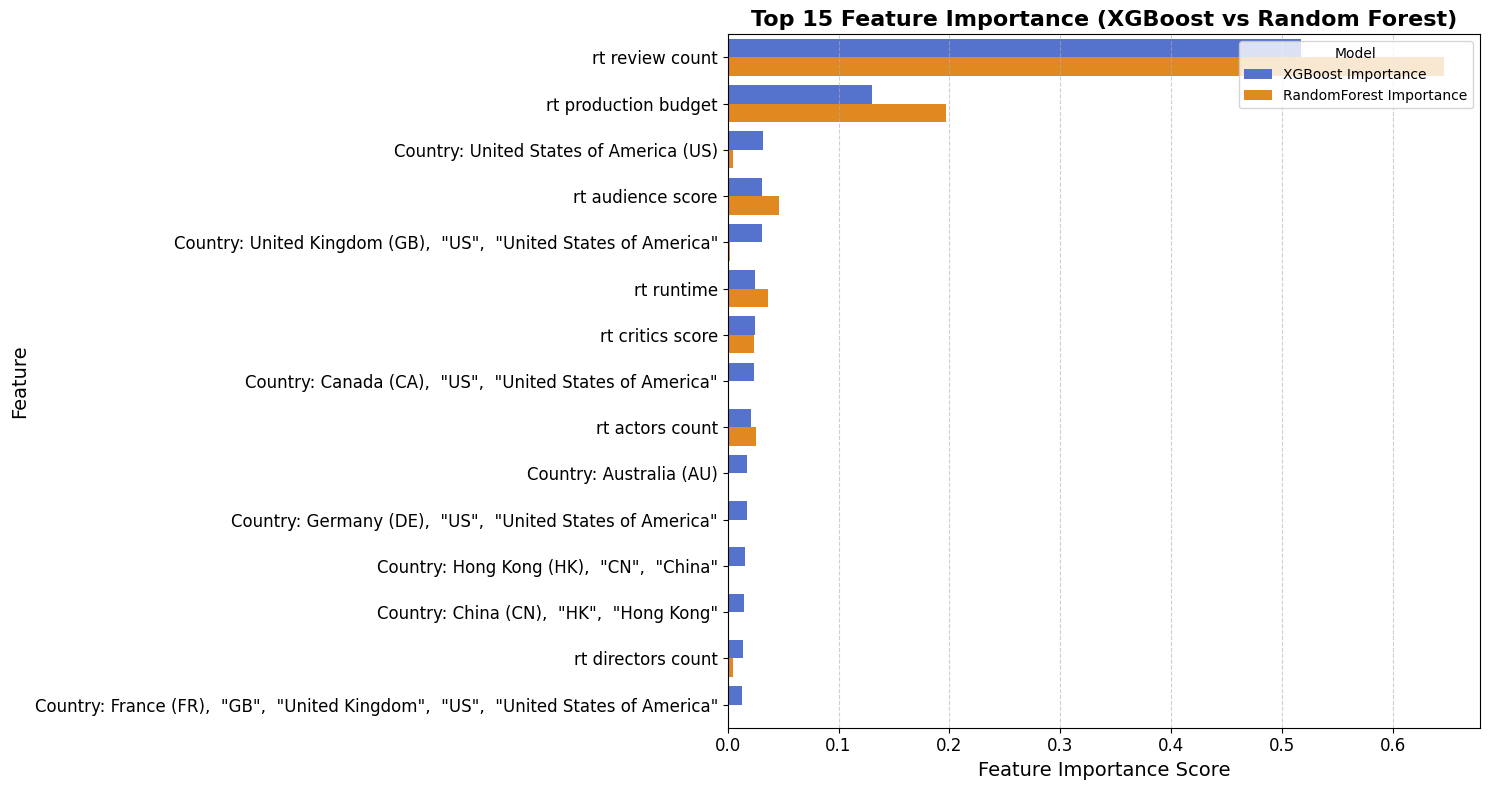


🔹 **Top 15 Features by Importance:**

                                                                           Feature  XGBoost Importance  RandomForest Importance
                                                                   rt review count            0.516552                 0.646070
                                                              rt production budget            0.129888                 0.197156
                                            Country: United States of America (US)            0.032015                 0.004583
                                                                 rt audience score            0.031365                 0.046609
                  Country: United Kingdom (GB),  "US",  "United States of America"            0.031075                 0.002045
                                                                        rt runtime            0.024841                 0.035960
                                                                 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re


def clean_feature_name(feature):
    feature = re.sub(r'Country_{"iso_3166_1":_"([^"]+)",_"name":_"([^"]+)"}', r'\2 (\1)', feature)
    feature = feature.replace('_', ' ')
    feature = feature.replace('{"iso 3166 1":', '').replace('"name":', '').replace('}', '')
    return feature.strip()


feature_importance_df["Feature"] = feature_importance_df["Feature"].apply(clean_feature_name)


feature_importance_df = feature_importance_df.sort_values(by="XGBoost Importance", ascending=False).head(15)


plt.figure(figsize=(15, 8))
sns.barplot(
    data=feature_importance_df.melt(id_vars="Feature", var_name="Model", value_name="Importance"),
    x="Importance", y="Feature", hue="Model",
    palette={"XGBoost Importance": "royalblue", "RandomForest Importance": "darkorange"}
)
plt.title("Top 15 Feature Importance (XGBoost vs Random Forest)", fontsize=16, fontweight="bold")
plt.xlabel("Feature Importance Score", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.legend(title="Model", loc="upper right")
plt.tight_layout()
plt.show()


print("\n **Top 15 Features by Importance:**\n")
print(feature_importance_df.to_string(index=False))


مقایسه مقادیر واقعی و پیش بینی شده 

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

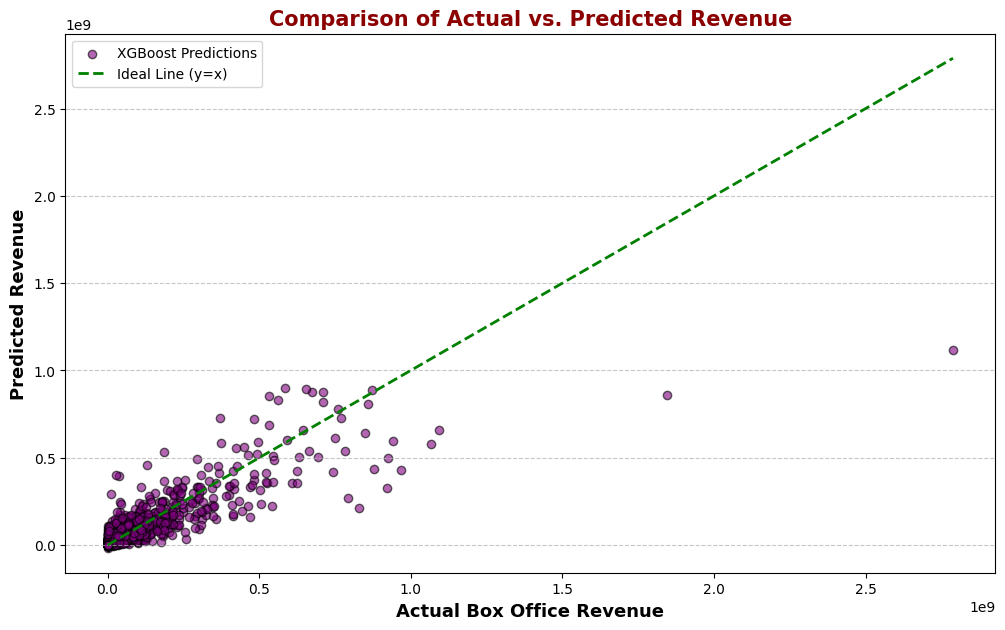

In [336]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 7))
plt.scatter(y_test, y_pred_xgb, color='purple', alpha=0.6, edgecolors='black', label='XGBoost Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--", color="green", linewidth=2, label="Ideal Line (y=x)")
plt.xlabel("Actual Box Office Revenue", fontsize=13, fontweight="bold")
plt.ylabel("Predicted Revenue", fontsize=13, fontweight="bold")
plt.title("Comparison of Actual vs. Predicted Revenue", fontsize=15, fontweight="bold", color="darkred")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()

plt.show()



In [253]:
df_credit.head()

,rt_movie_id,rt_title,rt_actors,rt_staff
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
